#### MAESTRÍA EN ECONOMÍA APLICADA - UBA 2025
#### TALLER DE PROGRAMACIÓN
#### GRUPO 2 - TP1

In [28]:
# Librerías a utilizar
# !pip install openpyxl - utilizar en caso no te cargue el archivo de excel
import pandas as pd
import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt

In [29]:
# Carga de datos de individuos de la EPH 1T2005-1T2025
T105_original = pd.read_stata("C:\\Users\\Usuario\\Documents\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\usu_individual_T105.dta",convert_categoricals=False)
T125_original = pd.read_excel("C:\\Users\\Usuario\\Documents\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\usu_individual_T125.xlsx")

In [30]:
# Carga de datos de hogares de la EPH 1T2005-1T2025 (para parte 1.d, que es opcional)
H105_original = pd.read_stata("C:\\Users\\Usuario\\Documents\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\Hogar_T105.dta",convert_categoricals=False)
H125_original = pd.read_excel("C:\\Users\\Usuario\\Documents\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\usu_hogar_T125.xlsx")

#### PARTE 1 - 2.a: Selección de región y fusión de bases

In [31]:
# Seleccion de variables de interes
select_var_T105 = ["CODUSU", "nro_hogar", "ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado", "cat_inac", "ipcf",
                   "cat_ocup", "pp03c", "pp03i", "pp10a", "p21", "tot_p12", "t_vi"]
select_var_T125 = ["CODUSU", "NRO_HOGAR", "CH04", "CH06", "CH07", "CH08", "NIVEL_ED", "ESTADO", "CAT_INAC", "IPCF",
                   "CAT_OCUP", "PP03C", "PP03I", "PP10A", "P21", "TOT_P12", "T_VI"]

# Actualizamos nuestro dataframe con las variables seleccionadas y la región seleccionada Noroeste = NOA = 40
T105 = T105_original[T105_original['region'] == 40][select_var_T105]
T125 = T125_original[T125_original['REGION'] == 40][select_var_T125]

# Homogeneizamos los nombres de las columnas para poder fusionarlas más adelante
column_mapping = dict(zip(select_var_T125, select_var_T105)) # diccionario
T125 = T125.rename(columns=column_mapping) # renombramos

In [32]:
# Antes de proceder con la unión de ambas bases, verificamos que ambas tengan el mismo tipo de dato.
T105.info()
T125.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9348 entries, 9484 to 18831
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CODUSU     9348 non-null   object 
 1   nro_hogar  9348 non-null   float64
 2   ch04       9348 non-null   float64
 3   ch06       9348 non-null   float64
 4   ch07       9348 non-null   float64
 5   ch08       9348 non-null   float64
 6   nivel_ed   9348 non-null   float64
 7   estado     9348 non-null   float64
 8   cat_inac   9348 non-null   float64
 9   ipcf       9348 non-null   float64
 10  cat_ocup   9348 non-null   float64
 11  pp03c      9348 non-null   float64
 12  pp03i      9348 non-null   float64
 13  pp10a      9348 non-null   float64
 14  p21        9348 non-null   float64
 15  tot_p12    9348 non-null   float64
 16  t_vi       9348 non-null   float64
dtypes: float64(16), object(1)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 9742 entries, 31 to 45397
Data colum

#### PARTE 1 - 2.b: Revisión de formato

In [33]:
# Ajustamos el Dtype para ambas bases
categóricas = ["ch04","ch06","ch07","ch08","nivel_ed","estado","cat_inac", "cat_ocup", "pp03c","pp03i","pp10a"]
T105[categóricas] = T105[categóricas].astype('int64')
T125["ch08"] = T125["ch08"].astype('int64')

# Creamos columna para identificar los df
T105['df'] = 'T105'
T125['df'] = 'T125'

# Fusionamos los archivos
eph_105_125 = pd.concat([T105, T125], ignore_index=True)
eph_105_125.sample(6)

,CODUSU,nro_hogar,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,cat_ocup,pp03c,pp03i,pp10a,p21,tot_p12,t_vi,df
14991,TQRMNOSXSHLMLNCDEHIBB00853806,1.0,1,26,5,4,4,1,0,292000.00,3,1.0,2.0,NaN,340000.0,0.0,0.0,T125
4932,198840,1.0,2,27,2,4,2,3,4,50.00,0,0.0,0.0,0.0,0.0,0.0,0.0,T105
119,138465,1.0,1,69,1,1,4,3,1,689.00,0,0.0,0.0,0.0,0.0,0.0,658.0,T105
15210,TQRMNORWWHLLLLCDEHPJB00854375,1.0,2,27,1,1,5,1,0,450000.00,3,1.0,2.0,NaN,500000.0,0.0,0.0,T125
13046,TQRMNOQQXHMOLNCDEHLEH00879532,1.0,1,48,5,4,2,3,6,0.00,0,NaN,NaN,NaN,0.0,0.0,-9.0,T125
14815,TQRMNOUVTHLOLNCDEHLEH00877201,1.0,1,43,2,12,5,3,4,296666.67,0,NaN,NaN,NaN,0.0,0.0,0.0,T125


In [34]:
# Procedemos a revisar las variables que tenemos, exceptuando las cariables de identificación
eph_105_125.drop("nro_hogar", axis=1).describe()

,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,cat_ocup,pp03c,pp03i,pp10a,p21,tot_p12,t_vi
count,19090.000000,19090.000000,19090.000000,19090.000000,19090.000000,19090.000000,19090.000000,1.909000e+04,19090.000000,13701.000000,13701.000000,9571.000000,1.909000e+04,1.909000e+04,1.909000e+04
mean,1.518491,32.657098,3.728392,2.731011,3.632635,2.301100,1.895862,1.878937e+05,1.190257,0.565871,1.029487,0.207606,1.183426e+05,9.127822e+03,5.466182e+04
std,0.499671,21.544972,1.583989,2.411227,1.858963,1.157584,1.996001,3.135108e+05,1.404829,0.589433,0.958865,0.853200,3.122836e+05,7.646590e+04,1.905967e+05
min,1.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-9.000000e+00,-9.000000e+00,-9.000000e+00
25%,1.000000,15.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.453125e+02,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000,29.000000,5.000000,2.000000,4.000000,3.000000,1.000000,6.362500e+02,0.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000,48.000000,5.000000,4.000000,5.000000,3.000000,3.000000,3.000000e+05,3.000000,1.000000,2.000000,0.000000,6.000000e+02,0.000000e+00,0.000000e+00
max,2.000000,103.000000,5.000000,23.000000,7.000000,4.000000,7.000000,6.150000e+06,4.000000,2.000000,9.000000,5.000000,7.000000e+06,2.700000e+06,4.500000e+06


En base a esta tabla y al diseño del cuestionario de la EPH y detectamos que:

* CH06 (edad): existencia de valores negativos, que representa menores de un año
* CH08 (cobertura médica): 9 implica no respuesta
* CAT_INAC (categoria de inactividad): presenta 0, lo que es una señal de que no aplica esta pregunta para esa persona
* CAT_OCUP (categoria de actividad): presenta 0, lo que es una señal de que no aplica esta pregunta para esa persona
* ESTADO (condición de actividad): presenta 0, que implica no respuesta
* PP03C (empleo semana anterior): presenta 0, lo que es una señal de que no aplica esta pregunta para esa persona
* PP03I (buscó trabajo en el último mes): presenta 0, lo que es una señal de que no aplica esta pregunta para esa persona, y también 9, que es no responde
* PP10A (cuanto hace que busca empleo): presenta 0, lo que es una señal de que no aplica esta pregunta para esa persona, y también 9, que es no responde
* P21, TOT_P12 y T_VI, que son ingresos: presentan -9, indicativo de no respuesta

#### PARTE 1 - 2.c: Corrección de datos y heatmap

In [38]:
# Correcciones de datos
eph_105_125['ch06'] = eph_105_125['ch06'].replace(-1, 0) # Menores de 1 año
eph_105_125['ch08'] = eph_105_125['ch08'].replace(9, np.nan) # No sabe/No responde en cobertura médica
eph_105_125['estado'] = eph_105_125['estado'].replace(0, np.nan) # No responde estado de actividad
eph_105_125['p21'] = eph_105_125['p21'].replace(-9, np.nan) # No respuesta en ingreso ocupación principal
eph_105_125['tot_p12'] = eph_105_125['tot_p12'].replace(-9, np.nan) # No respuesta en ingreso otras ocupaciones
eph_105_125['t_vi'] = eph_105_125['t_vi'].replace(-9, np.nan) # No respuesta en total ingreso no laboral

# Se opta por no modificar los datos que implican no aplica, dado que representa una diferencia cualitativa y no un faltante de datos

In [39]:
# Revisamos los valores faltantes
eph_105_125.isna().sum()

CODUSU          0
nro_hogar       0
ch04            0
ch06            0
ch07            0
ch08           15
nivel_ed        0
estado         24
cat_inac        0
ipcf            0
cat_ocup        0
pp03c        5389
pp03i        5389
pp10a        9519
p21           246
tot_p12        44
t_vi          108
df              0
dtype: int64

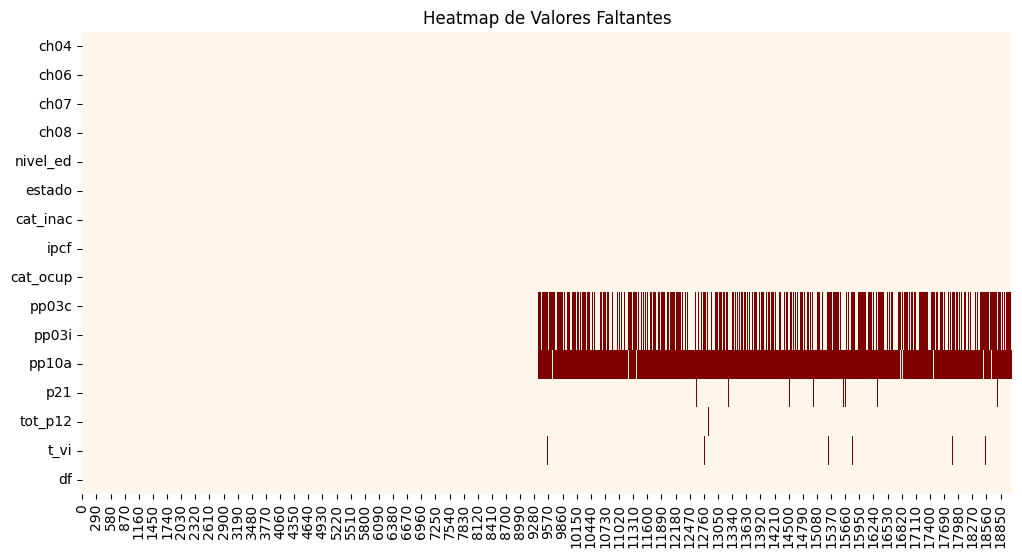

In [40]:
# Heatmap de valores faltantes
plt.figure(figsize=(12, 6))
sns.heatmap(eph_105_125.drop(['CODUSU','nro_hogar'], axis=1).isna().transpose(), cbar=False, cmap='OrRd')
plt.title('Heatmap de Valores Faltantes')
plt.show()

#### PARTE 1 - 2.d: Unión de base Hogares e Individuos 

In [53]:
# Seleccion de variables de interes
sel_HOG_T105 = ["CODUSU", "nro_hogar", "iv1", "iv2", "iv6", "iv8", "ii8"]
sel_HOG_T125 = ["CODUSU", "NRO_HOGAR", "IV1", "IV2", "IV6", "IV8", "II8"]

# Actualizamos nuestro dataframe con las variables seleccionadas y la región seleccionada Noroeste = NOA = 40
HOG_T105 = H105_original[H105_original['region'] == 40][sel_HOG_T105]
HOG_T125 = H125_original[H125_original['REGION'] == 40][sel_HOG_T125]

# Homogeneizamos los nombres de las columnas para poder fusionarlas más adelante
column_mapping_hog = dict(zip(sel_HOG_T125, sel_HOG_T105)) # diccionario
HOG_T125 = HOG_T125.rename(columns=column_mapping_hog) # renombramos

# Fusionamos los archivos
HOG_105_125 = pd.concat([HOG_T105, HOG_T125], ignore_index=True)
HOG_105_125.sample(6)

,CODUSU,nro_hogar,iv1,iv2,iv6,iv8,ii8
2390,TQRMNOQXUHMNKTCDEHPJB00880651,1.0,2.0,1.0,1.0,1.0,1.0
617,239432,1.0,1.0,4.0,1.0,1.0,2.0
1025,145185,1.0,1.0,3.0,1.0,1.0,1.0
4493,TQRMNOQPQHKNLNCDEHJGH00858354,1.0,1.0,4.0,1.0,1.0,1.0
856,205014,1.0,1.0,2.0,1.0,1.0,2.0
4182,TQRMNOQXSHLMLLCDEHIBB00853747,1.0,1.0,3.0,1.0,1.0,1.0


In [57]:
# INNER JOIN
inner = eph_105_125.merge(HOG_105_125, on=['CODUSU', 'nro_hogar'], how='inner')
print(f"Inner Join estructura: {inner.shape}, número de NAN: {inner.isna().sum().sum()}")

# LEFT JOIN
left = eph_105_125.merge(HOG_105_125, on=['CODUSU', 'nro_hogar'], how='left')
print(f"Left Join estructura: {left.shape}, número de NAN: {left.isna().sum().sum()}")

# RIGHT JOIN
right = eph_105_125.merge(HOG_105_125, on=['CODUSU', 'nro_hogar'], how='right')
print(f"Right Join estructura: {right.shape}, número de NAN: {right.isna().sum().sum()}")

# OUTER JOIN
outer = eph_105_125.merge(HOG_105_125, on=['CODUSU', 'nro_hogar'], how='outer')
print(f"Outer Join estructura: {outer.shape}, número de NAN: {outer.isna().sum().sum()}")

Inner Join estructura: (19090, 23), número de NAN: 20734
Left Join estructura: (19090, 23), número de NAN: 20734
Right Join estructura: (19090, 23), número de NAN: 20734
Outer Join estructura: (19090, 23), número de NAN: 20734


Son todos iguales básicamente por el hecho de que se deben corresponder uno a uno. Es decir, para cada persona hay un hogar asociado y viceversa, por lo tanto cada intento de unión arroja el mismo resultado.

#### PARTE 2 - 3: Gráfico de barras por sexo

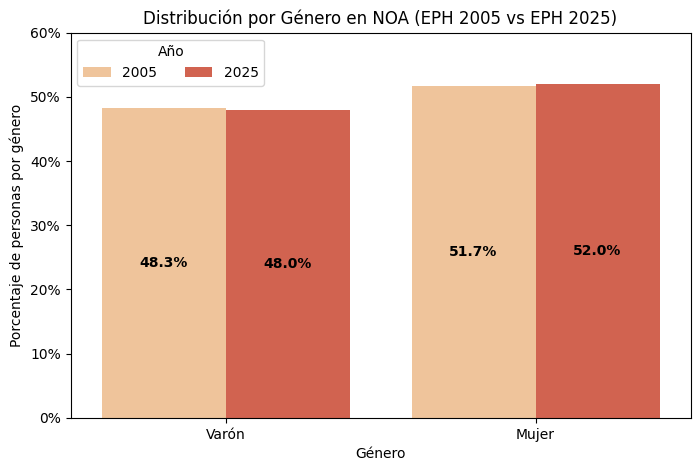

In [116]:
# Calculamos el porcentaje de varones y mujeres por año
porcentaje_genero = eph_105_125.groupby(['df', 'ch04']).size().reset_index(name='cantidad')
porcentaje_genero['porcentaje'] = porcentaje_genero.groupby('df')['cantidad'].transform(lambda x: x / x.sum())
porcentaje_genero["df"] = porcentaje_genero["df"].replace({"T105": "2005", "T125": "2025"})

# Visualizamos los resultados
plt.figure(figsize=(8, 5))
sns.barplot(data=porcentaje_genero, x='ch04', y='porcentaje', hue='df', palette='OrRd')
plt.xticks([0, 1], ['Varón', 'Mujer'])
plt.yticks(np.arange(0, 0.66, 0.1), labels=[f'{int(x*100)}%' for x in np.arange(0, 0.66, 0.1)])
plt.legend(title="Año", loc="upper left", ncol=2)
plt.xlabel('Género')
plt.ylabel('Porcentaje de personas por género')
plt.title('Distribución por Género en NOA (EPH 2005 vs EPH 2025)')

# Agregar etiquetas de porcentaje en cada barra
for i, bar in enumerate(plt.gca().patches):
    height = bar.get_height()
    if height == 0:
        pass
    else:
        # Agregar etiquetas de porcentaje en cada barra, centradas y en negrita, eliminando la última etiqueta extra
        plt.gca().text(
            bar.get_x() + bar.get_width() / 2,
            height / 2,
            f'{height:.1%}',
            ha='center',
            va='center',
            fontsize=10,
            fontweight='bold'
            )

plt.show()

#### PARTE 2 - 4: Matriz de correlaciones

In [117]:
eph_105_125

,CODUSU,nro_hogar,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,cat_ocup,pp03c,pp03i,pp10a,p21,tot_p12,t_vi,df
0,125666,1.0,1,36,1,4.0,3,1.0,0,140.0,3,1.0,1.0,0.0,300.0,0.0,0.0,T105
1,125666,1.0,2,35,1,4.0,2,3.0,4,140.0,0,0.0,0.0,0.0,0.0,0.0,0.0,T105
2,125666,1.0,2,15,5,4.0,3,3.0,3,140.0,0,0.0,0.0,0.0,0.0,0.0,300.0,T105
3,125666,1.0,1,12,5,4.0,3,3.0,3,140.0,0,0.0,0.0,0.0,0.0,0.0,0.0,T105
4,125666,1.0,1,10,5,4.0,1,3.0,3,140.0,0,0.0,0.0,0.0,0.0,0.0,0.0,T105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19085,TQRMNOQYSHMKKRCDEHIBB00882443,1.0,2,90,4,1.0,4,3.0,1,1250000.0,0,NaN,NaN,NaN,0.0,0.0,1500000.0,T125
19086,TQRMNOQYSHMKKRCDEHIBB00882443,1.0,2,60,5,1.0,6,1.0,0,1250000.0,3,0.0,2.0,NaN,1500000.0,0.0,0.0,T125
19087,TQRMNOQYSHMKKRCDEHIBB00882443,1.0,2,22,5,1.0,5,3.0,3,1250000.0,0,NaN,NaN,NaN,0.0,0.0,0.0,T125
19088,TQRMNOPPVHKOKSCDEHIBB00860370,1.0,1,25,1,4.0,2,1.0,0,537500.0,3,1.0,2.0,NaN,400000.0,0.0,0.0,T125


In [123]:
eph_105_125.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19090 entries, 0 to 19089
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CODUSU     19090 non-null  object 
 1   nro_hogar  19090 non-null  float64
 2   ch04       19090 non-null  int64  
 3   ch06       19090 non-null  int64  
 4   ch07       19090 non-null  int64  
 5   ch08       19075 non-null  float64
 6   nivel_ed   19090 non-null  int64  
 7   estado     19066 non-null  float64
 8   cat_inac   19090 non-null  int64  
 9   ipcf       19090 non-null  float64
 10  cat_ocup   19090 non-null  int64  
 11  pp03c      13701 non-null  float64
 12  pp03i      13701 non-null  float64
 13  pp10a      9571 non-null   float64
 14  p21        18844 non-null  float64
 15  tot_p12    19046 non-null  float64
 16  t_vi       18982 non-null  float64
 17  df         19090 non-null  object 
dtypes: float64(10), int64(6), object(2)
memory usage: 2.6+ MB


In [ ]:
# Seleccion de variables de interes
corr = pd.DataFrame()

#eph_105_125[['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']]

# Binarias:
corr["Varon"] = eph_105_125['ch04'].apply(lambda x: 1 if x == 1 else 0)
corr["Mujer"] = eph_105_125['ch04'].apply(lambda x: 1 if x == 2 else 0)

corr["Unido"] = eph_105_125['ch07'].apply(lambda x: 1 if x == 1 else 0) # Unido
corr["Casado"] = eph_105_125['ch07'].apply(lambda x: 1 if x == 2 else 0) # Casado
corr["Divorciado"] = eph_105_125['ch07'].apply(lambda x: 1 if x == 3 else 0) # Divorciado
corr["Viudo"] = eph_105_125['ch07'].apply(lambda x: 1 if x == 4 else 0) # Viudo
corr["Soltero"] = eph_105_125['ch07'].apply(lambda x: 1 if x == 5 else 0) # Soltero

# Agrupamos para la cobertura médica, para simplificar el análisis
corr["Obra social"] = eph_105_125['ch08'].apply(lambda x: 1 if x in [1, 12, 13, 123] else 0) # Obra social
corr["Prepaga"] = eph_105_125['ch08'].apply(lambda x: 1 if x in [2, 12, 23, 123] else 0) # Mutual/prepaga/servicio de emergencia
corr["Planes publicos"] = eph_105_125['ch08'].apply(lambda x: 1 if x in [3, 13, 23, 123] else 0) # Planes y seguros públicos
corr["No tiene"] = eph_105_125['ch08'].apply(lambda x: 1 if x == 4 else 0) # No paga ni le descuentan

corr["Primario Incompleto"] = eph_105_125['nivel_ed'].apply(lambda x: 1 if x in [1] else 0) # Primario incompleto y completo
corr["Primario Completo"] = eph_105_125['nivel_ed'].apply(lambda x: 1 if x in [2] else 0) # Primario completo
corr["Secundario Incompleto"] = eph_105_125['nivel_ed'].apply(lambda x: 1 if x in [3] else 0) # Secundario incompleto
corr["Secundario Completo"] = eph_105_125['nivel_ed'].apply(lambda x: 1 if x in [4] else 0) # Secundario completo
corr["Superior Incompleto"] = eph_105_125['nivel_ed'].apply(lambda x: 1 if x in [5] else 0) # Superior y universitario incompleto
corr["Superior Completo"] = eph_105_125['nivel_ed'].apply(lambda x: 1 if x in [6] else 0) # Superior y universitario completo
corr["Sin Instrucción"] = eph_105_125['nivel_ed'].apply(lambda x: 1 if x == 7 else 0) # Sin instrucción

,Varon,Mujer,Unido,Casado,Divorciado,Viudo,Soltero,Obra social,Prepaga,Planes publicos,No tiene,Primario Incompleto,Primario Completo,Secundario Incompleto,Secundario Completo,Superior Incompleto,Superior Completo,Sin Instrucción
0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19085,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
19086,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
19087,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
19088,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
